## What is KNN imputation..?<br>->It is type of multivariate imputation where , NaN values are fill using Other columns and rows,<br> It uses the conccept of Euclidean Distance to calculate Null Values<br> This Is most Efficient Method to fill null vallues of relatively Small Data

## FORMULA<br>->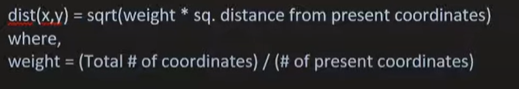<br>

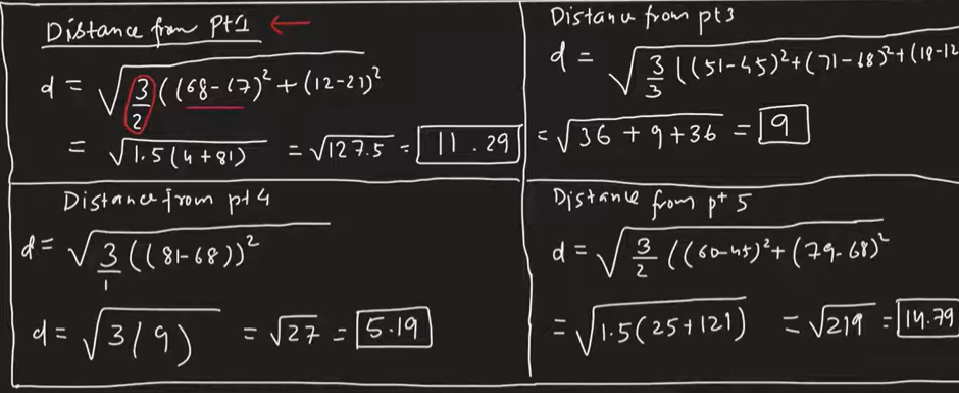# 

### Advantage->IT Is more Accurate the any other imputation Technique<br> Disadvantage-> 1.Requires More Number Of Calculation <br> 2. Requires More memory on server at the time of Production

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer , KNNImputer

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv("train.csv",usecols=["Age","Survived","Fare","Pclass"])

In [4]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [5]:
df.isnull().mean()*100

Survived     0.00000
Pclass       0.00000
Age         19.86532
Fare         0.00000
dtype: float64

##### from above we can see that Age has 19% null values

In [6]:
X=df.drop(columns=["Survived"])
Y=df["Survived"]

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
X_train.head()

,Pclass,Age,Fare
331,1,45.5,28.5000
733,2,23.0,13.0000
382,3,32.0,7.9250
704,3,26.0,7.8542
813,3,6.0,31.2750


In [35]:
knn=KNNImputer(n_neighbors=3,weights="distance")
X_train_trf=knn.fit_transform(X_train)
X_test_trf=knn.transform(X_test)
X_train_trf=pd.DataFrame(X_train_trf,columns=X_train.columns)
X_train_trf.head()

,Pclass,Age,Fare
0,1.0,45.5,28.5000
1,2.0,23.0,13.0000
2,3.0,32.0,7.9250
3,3.0,26.0,7.8542
4,3.0,6.0,31.2750


In [20]:
lr=LogisticRegression()
lr.fit(X_train_trf,Y_train)

pred=lr.predict(X_test_trf)

accuracy_score(pred,Y_test)

0.7374301675977654

In [46]:
#Comparinf With Simple Imputer

simple=SimpleImputer(strategy="mean")

X_train_tr=simple.fit_transform(X_train)
X_test_tr=simple.transform(X_test)
X_train_tr=pd.DataFrame(X_train_tr,columns=X_train.columns)

In [47]:
Linear=LogisticRegression()

Linear.fit(X_train_tr,Y_train)

predict=Linear.predict(X_test_tr)

accuracy_score(predict,Y_test)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7374301675977654

##### You can see that above KNN imputer has more accuracy than SimpleImputer

<Axes: ylabel='Density'>

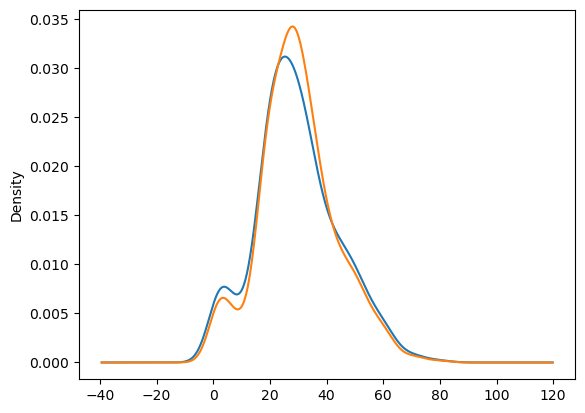

In [50]:
from matplotlib.pyplot import plot
#Distribution of KNN imputed Data
X_train["Age"].plot(kind="kde")
X_train_trf["Age"].plot(kind="kde")

<Axes: ylabel='Density'>

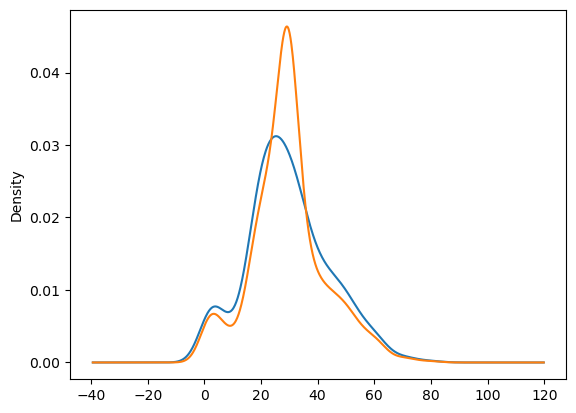

In [49]:
#Distribution Of SimpleImputed(mean) Data
X_train["Age"].plot(kind="kde")
X_train_tr["Age"].plot(kind="kde")

#### From the Above Graphs you can see that Distribution of Data in KNN imputer is not chnage , But in case of Simple Imputer the distribution of Age column is Change widely, Because of Such reasons KNN imputer is very useful

# Conclude